In [1]:
import numpy as np
import pandas as pd
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:

# Load  dataset 
df = pd.read_csv(r'..\Data\data.csv')
# Group by CustomerId and find if any fraudulent transactions exist for each customer
df['RiskLabel'] = df.groupby('CustomerId')['FraudResult'].transform(lambda x: 'high-risk' if x.max() == 1 else 'low-risk')

# Check the result
df[['CustomerId', 'FraudResult', 'RiskLabel']].drop_duplicates().head()

df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,RiskLabel
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,low-risk
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,low-risk
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,low-risk
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,low-risk
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,low-risk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [4]:
# check target balance (BAD)
df.stb.freq(['FraudResult'], style = True)

,FraudResult,count,percent,cumulative_count,cumulative_percent
0,0,"95,469",99.80%,"95,469",99.80%
1,1,193,0.20%,"95,662",100.00%


In [5]:
# Check numeric variables
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [6]:
# missing check
df.stb.missing()

,missing,total,percent
TransactionId,0,95662,0.0
ProductCategory,0,95662,0.0
FraudResult,0,95662,0.0
PricingStrategy,0,95662,0.0
TransactionStartTime,0,95662,0.0
Value,0,95662,0.0
Amount,0,95662,0.0
ChannelId,0,95662,0.0
ProductId,0,95662,0.0
BatchId,0,95662,0.0


### Unvariate analysis

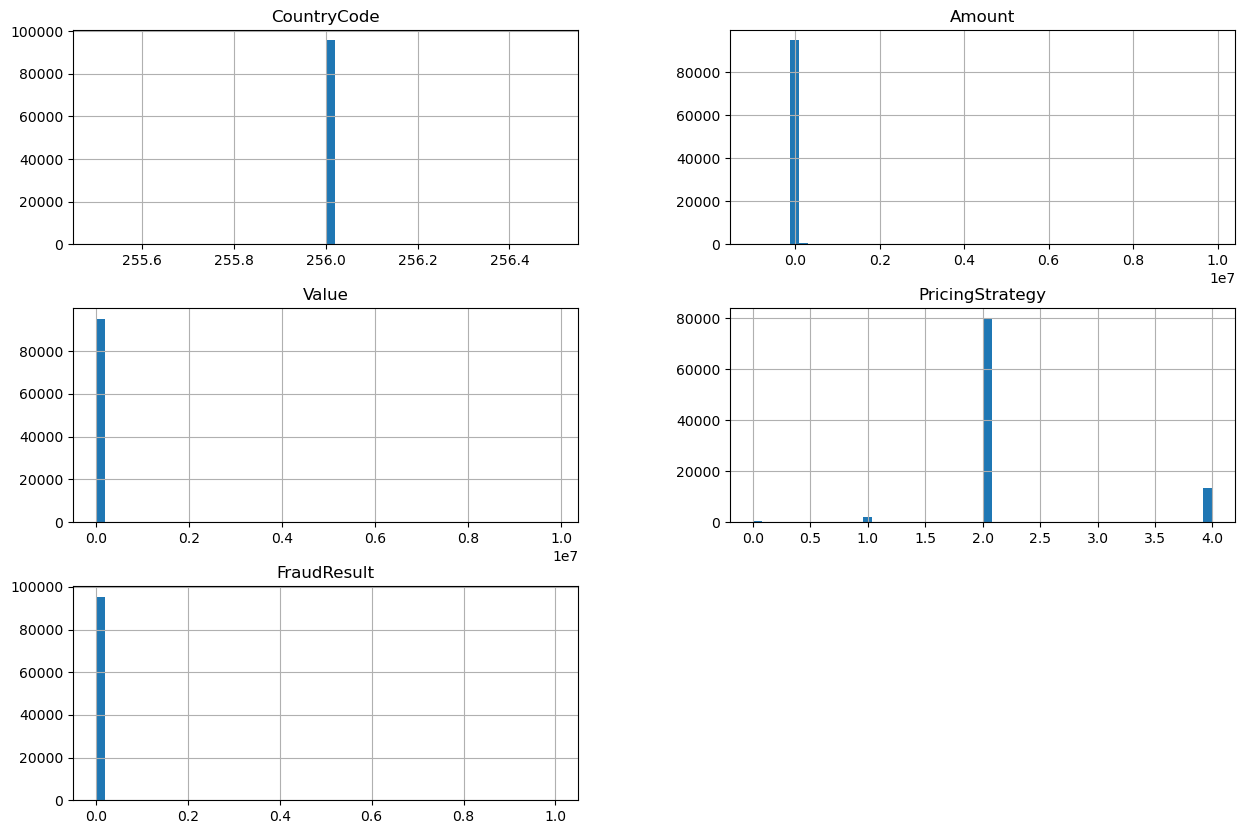

In [7]:
# distribution plots - Histograms
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);

## Bivariate Analysis

In [8]:
df.drop('CountryCode', axis=1, inplace=True)

In [9]:
# Selecting only numeric variables
numeric_df = df.select_dtypes(include=['number'])

In [ ]:
numeric_df.corr()

,Amount,Value,PricingStrategy,FraudResult
Amount,1.000000,0.989692,-0.061931,0.557370
Value,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,0.557370,0.566739,-0.033821,1.000000


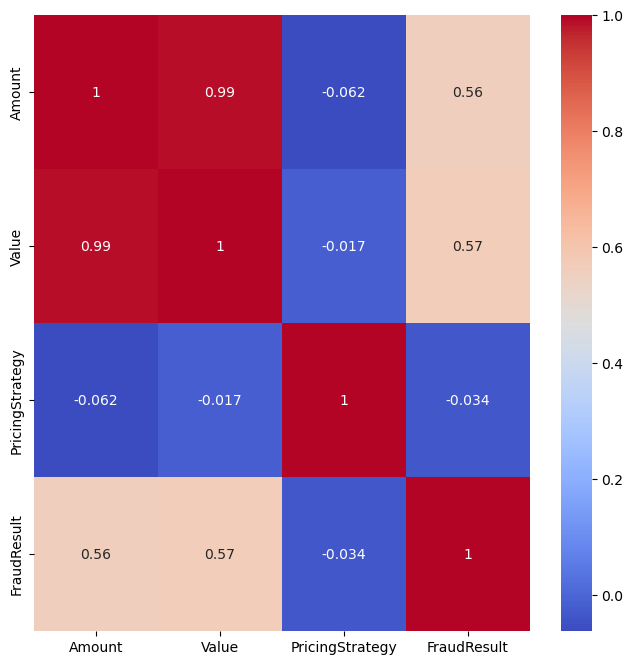

In [11]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(numeric_df.corr(),
            cmap = 'coolwarm',
            annot = True)

In [12]:
#Overview of the Data
# Show the basic structure of the dataset (rows, columns, data types)
df_info = df.info()
df_head = df.head()

# Output
print(df_info)
print(df_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   ProviderId            95662 non-null  object 
 7   ProductId             95662 non-null  object 
 8   ProductCategory       95662 non-null  object 
 9   ChannelId             95662 non-null  object 
 10  Amount                95662 non-null  float64
 11  Value                 95662 non-null  int64  
 12  TransactionStartTime  95662 non-null  object 
 13  PricingStrategy       95662 non-null  int64  
 14  FraudResult           95662 non-null  int64  
 15  RiskLabel          

In [13]:
#Summary Statistics for Numerical Features

# Summary statistics for numerical columns
summary_stats = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()

# Extracting categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64']).columns

# Output
print(summary_stats)
print(missing_values)
print(categorical_cols)
print(numerical_cols)



             Amount         Value  PricingStrategy   FraudResult
count  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean   6.717846e+03  9.900584e+03         2.255974      0.002018
std    1.233068e+05  1.231221e+05         0.732924      0.044872
min   -1.000000e+06  2.000000e+00         0.000000      0.000000
25%   -5.000000e+01  2.750000e+02         2.000000      0.000000
50%    1.000000e+03  1.000000e+03         2.000000      0.000000
75%    2.800000e+03  5.000000e+03         2.000000      0.000000
max    9.880000e+06  9.880000e+06         4.000000      1.000000
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
RiskLabel               0

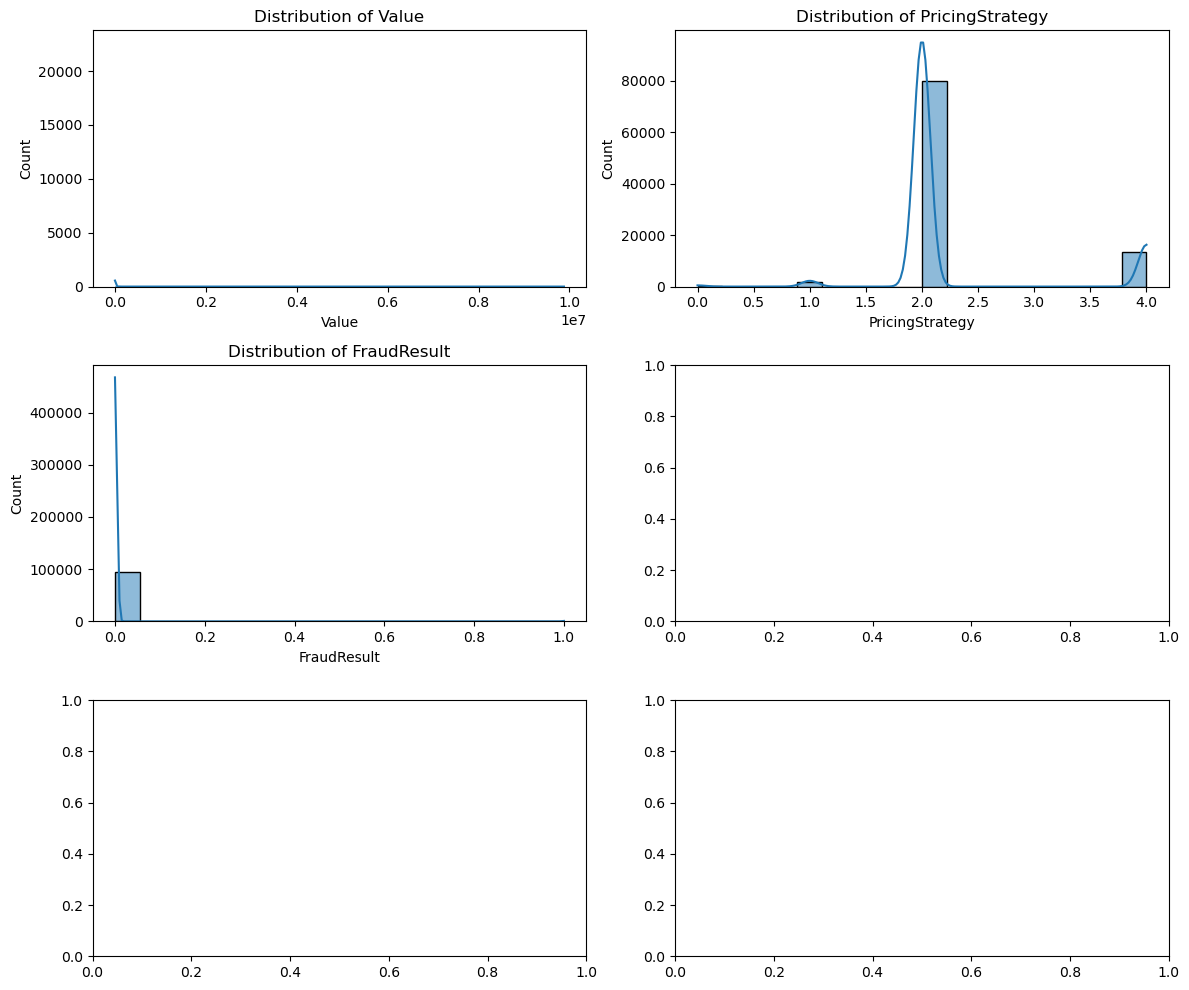

In [14]:
#Distribution of Numerical Features
# Set up the plot grid for numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Plot distribution for each numerical feature
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

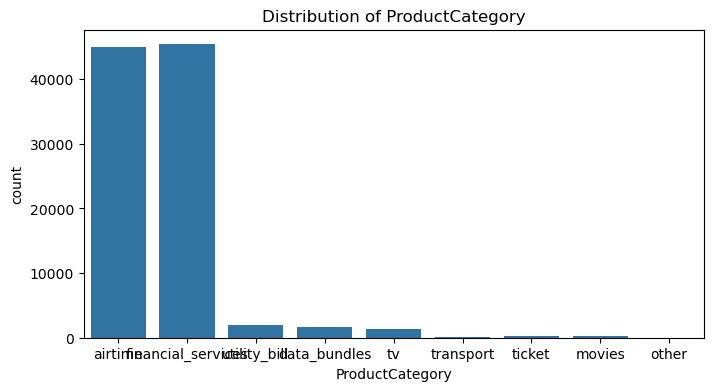

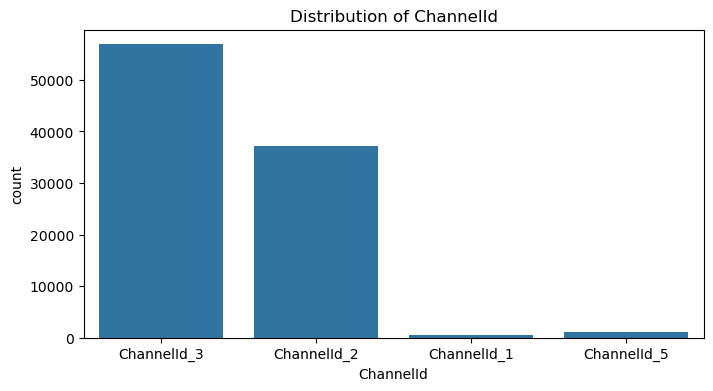

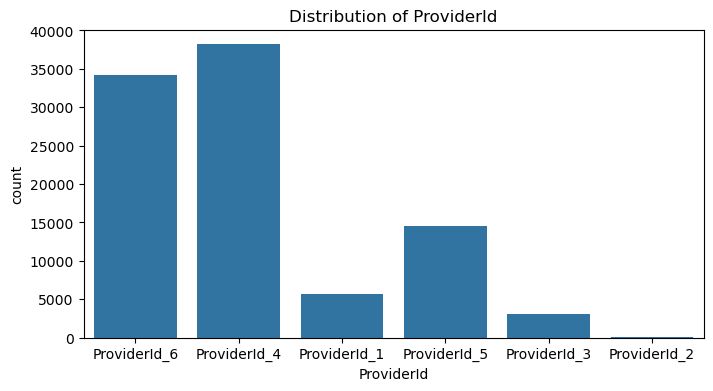

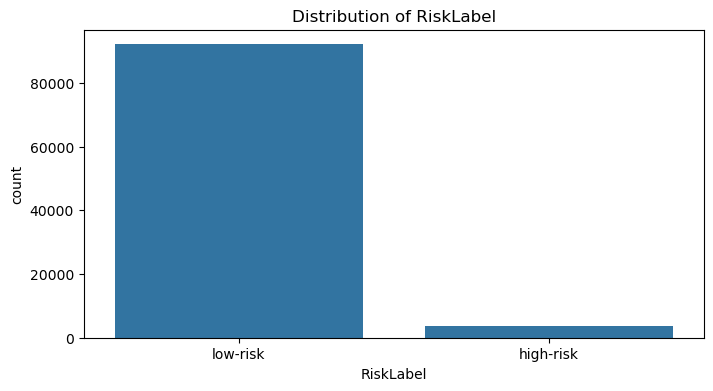

In [15]:
#Distribution of Categorical Features
import seaborn as sns

categorical_columns = ['ProductCategory', 'ChannelId', 'ProviderId', 'RiskLabel']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

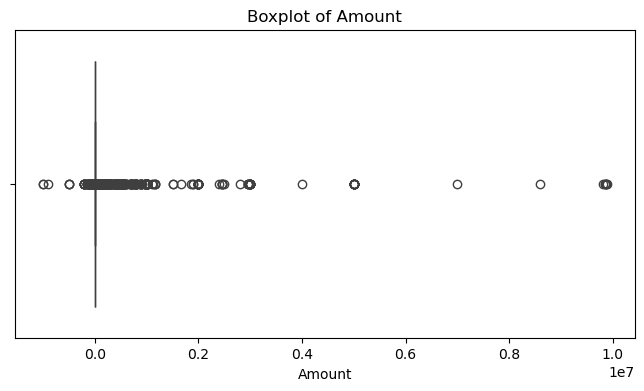

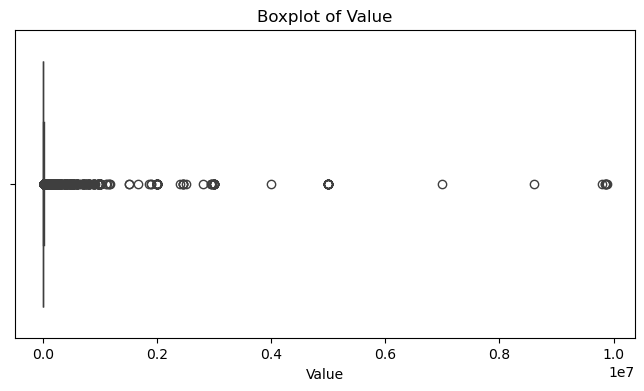

In [16]:
#Outlier Detection
for col in ['Amount', 'Value']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [17]:
#Aggregate Features Creation
# Aggregate features to create based on customer transactions
# Ensure that the 'CustomerId' is present in the dataset for grouping

# Group by 'CustomerId' to calculate aggregated features
agg_features = df.groupby('CustomerId').agg(
    TotalTransactionAmount=('Amount', 'sum'),             # Sum of all transaction amounts
    AverageTransactionAmount=('Amount', 'mean'),          # Average transaction amount
    TransactionCount=('Amount', 'count'),                 # Number of transactions
    StdDevTransactionAmount=('Amount', 'std')             # Standard deviation of transaction amounts
).reset_index()

# Display the newly created aggregate features
agg_features.head()



,CustomerId,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdDevTransactionAmount
0,CustomerId_1,-10000.0,-10000.000000,1,NaN
1,CustomerId_10,-10000.0,-10000.000000,1,NaN
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333
3,CustomerId_1002,4225.0,384.090909,11,560.498966
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146


In [18]:
#Handling Negative Transactions
# Separate positive and negative transactions
df['TransactionType'] = df['Amount'].apply(lambda x: 'Refund' if x < 0 else 'Purchase')

# Aggregate for both positive and negative transactions
agg_features = df.groupby('CustomerId').agg(
    TotalTransactionAmount=('Amount', 'sum'),             # Sum of all transaction amounts
    TotalRefundAmount=('Amount', lambda x: x[x < 0].sum()),  # Sum of negative (refund) amounts
    TotalPurchaseAmount=('Amount', lambda x: x[x > 0].sum()),  # Sum of positive (purchase) amounts
    AverageTransactionAmount=('Amount', 'mean'),          # Average transaction amount
    TransactionCount=('Amount', 'count'),                 # Number of transactions
    StdDevTransactionAmount=('Amount', 'std')             # Standard deviation of transaction amounts
).reset_index()

# Replace NaN values in StdDevTransactionAmount with 0
agg_features['StdDevTransactionAmount'].fillna(0, inplace=True)

# Output the updated feature set
agg_features.head()


C:\Users\eep\AppData\Local\Temp\ipykernel_6048\4106193257.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  agg_features['StdDevTransactionAmount'].fillna(0, inplace=True)


,CustomerId,TotalTransactionAmount,TotalRefundAmount,TotalPurchaseAmount,AverageTransactionAmount,TransactionCount,StdDevTransactionAmount
0,CustomerId_1,-10000.0,-10000.0,0.0,-10000.000000,1,0.000000
1,CustomerId_10,-10000.0,-10000.0,0.0,-10000.000000,1,0.000000
2,CustomerId_1001,20000.0,-5200.0,25200.0,4000.000000,5,6558.963333
3,CustomerId_1002,4225.0,-275.0,4500.0,384.090909,11,560.498966
4,CustomerId_1003,20000.0,-6000.0,26000.0,3333.333333,6,6030.478146


In [19]:
#Validate Results
# Check for any remaining missing values
missing_values_after = agg_features.isnull().sum()
print(missing_values_after)

# Display the cleaned data
agg_features.head()


CustomerId                  0
TotalTransactionAmount      0
TotalRefundAmount           0
TotalPurchaseAmount         0
AverageTransactionAmount    0
TransactionCount            0
StdDevTransactionAmount     0
dtype: int64


,CustomerId,TotalTransactionAmount,TotalRefundAmount,TotalPurchaseAmount,AverageTransactionAmount,TransactionCount,StdDevTransactionAmount
0,CustomerId_1,-10000.0,-10000.0,0.0,-10000.000000,1,0.000000
1,CustomerId_10,-10000.0,-10000.0,0.0,-10000.000000,1,0.000000
2,CustomerId_1001,20000.0,-5200.0,25200.0,4000.000000,5,6558.963333
3,CustomerId_1002,4225.0,-275.0,4500.0,384.090909,11,560.498966
4,CustomerId_1003,20000.0,-6000.0,26000.0,3333.333333,6,6030.478146


In [20]:
#2.	Extract Features #Example:
#Transaction Hour: The hour of the day when the transaction occurred.
#Transaction Day: The day of the month when the transaction occurred.
#Transaction Month: The month when the transaction occurred.
#Transaction Year: The year when the transaction occurred.
# Ensure that 'Date' column is in datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionStartTime'])

# Extract transaction hour, day, month, and year
df['TransactionHour'] = df['TransactionDate'].dt.hour    # Hour of the transaction
df['TransactionDay'] = df['TransactionDate'].dt.day      # Day of the month
df['TransactionMonth'] = df['TransactionDate'].dt.month  # Month of the transaction
df['TransactionYear'] = df['TransactionDate'].dt.year    # Year of the transaction

# Display the updated dataset with new features
df[['CustomerId', 'TransactionDate', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']].head()


,CustomerId,TransactionDate,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,CustomerId_4406,2018-11-15 02:18:49+00:00,2,15,11,2018
1,CustomerId_4406,2018-11-15 02:19:08+00:00,2,15,11,2018
2,CustomerId_4683,2018-11-15 02:44:21+00:00,2,15,11,2018
3,CustomerId_988,2018-11-15 03:32:55+00:00,3,15,11,2018
4,CustomerId_988,2018-11-15 03:34:21+00:00,3,15,11,2018


In [21]:
#3.	Encode Categorical Variables
#Convert categorical variables into numerical format by using:
#One-Hot Encoding: Converts categorical values into binary vectors.
#Label Encoding: Assigns a unique integer to each category.
# Check data types in the dataframe
print(df.dtypes)

TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
Value                                 int64
TransactionStartTime                 object
PricingStrategy                       int64
FraudResult                           int64
RiskLabel                            object
TransactionType                      object
TransactionDate         datetime64[ns, UTC]
TransactionHour                       int32
TransactionDay                        int32
TransactionMonth                      int32
TransactionYear                       int32
dtype: object


In [22]:
#One-Hot Encoding
#For categorical variables that do not have an ordinal relationship, use One-Hot Encoding. This creates binary columns for each category.
# Perform One-Hot Encoding for non-ordinal categorical variables
categorical_columns_to_encode = ['ProductCategory', 'ProviderId', 'TransactionType']
df_one_hot_encoded = pd.get_dummies(df, columns=categorical_columns_to_encode, drop_first=True)

# Display the shape of the new dataframe
print(df_one_hot_encoded.shape)

# Display the first few rows of the updated dataframe
print(df_one_hot_encoded.head())


(95662, 33)
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode     ProductId    ChannelId   Amount  Value  \
0  CustomerId_4406          UGX  ProductId_10  ChannelId_3   1000.0   1000   
1  CustomerId_4406          UGX   ProductId_6  ChannelId_2    -20.0     20   
2  CustomerId_4683          UGX   ProductId_1  ChannelId_3    500.0    500   
3   CustomerId_988          UGX  ProductId_21  ChannelId_3  20000.0  21800   
4   CustomerId_988          UGX   ProductId_6  ChannelId_2   -644.0    644   

   ... ProductCategory_ticket  ProductCatego

In [23]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform Label Encoding on the 'RiskLabel' column
df_one_hot_encoded['EncodedRiskLabel'] = label_encoder.fit_transform(df_one_hot_encoded['RiskLabel'])

# Display the first few rows to see the changes
print(df_one_hot_encoded[['RiskLabel', 'EncodedRiskLabel']].head())


  RiskLabel  EncodedRiskLabel
0  low-risk                 1
1  low-risk                 1
2  low-risk                 1
3  low-risk                 1
4  low-risk                 1


In [24]:
# Display the mapping of labels to their encoded values
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(label_mapping)

{'high-risk': 0, 'low-risk': 1}


In [25]:
#4.	Handle Missing Values
#	Use imputation or Removal to handle missing values
#	Imputation: Filling missing values with mean, median, mode, or using more methods like KNN imputation.
# Removal: Removing rows or columns with missing values if they are few.
# Check for missing values
missing_values = df_one_hot_encoded.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [26]:
#5.	Normalize/Standardize Numerical Features
#Normalization and standardization are scaling techniques used to bring all numerical features onto a similar scale.
#Normalization: Scales the data to a range of [0, 1].
#Standardization: Scales the data to have a mean of 0 and a standard deviation of 1.
#Normalization
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler for normalization
scaler = MinMaxScaler()

# Select numerical columns for normalization
num_cols = df_one_hot_encoded.select_dtypes(include=['float64', 'int64']).columns

# Normalize the selected numerical columns
df_one_hot_encoded[num_cols] = scaler.fit_transform(df_one_hot_encoded[num_cols])


In [27]:
#Standardization
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler for standardization
standard_scaler = StandardScaler()

# Standardize the selected numerical columns
df_one_hot_encoded[num_cols] = standard_scaler.fit_transform(df_one_hot_encoded[num_cols])


In [28]:
# Create instances of MinMaxScaler and StandardScaler
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Normalize the 'Amount' and 'Value' columns
df['Amount_Normalized'] = minmax_scaler.fit_transform(df[['Amount']])
df['Value_Normalized'] = minmax_scaler.fit_transform(df[['Value']])

# Standardize the 'Amount' and 'Value' columns
df['Amount_Standardized'] = standard_scaler.fit_transform(df[['Amount']])
df['Value_Standardized'] = standard_scaler.fit_transform(df[['Value']])

In [29]:
!pip install scorecardpy
!pip install monotonic-binning
import scorecardpy as sc
from monotonic_binning.monotonic_woe_binning import Binning

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [30]:
# reLoad  dataset 
df = pd.read_csv(r'..\Data\data.csv')

In [31]:
# Step 1: Feature engineering for credit risk target variable

# Flagging negative transaction amounts (potential delinquencies)
df['NegativeTransactionFlag'] = df['Amount'].apply(lambda x: 1 if x < 0 else 0)

# Rolling sum of negative transactions per AccountId (to capture repeated delinquencies)
df['RollingNegativeSum'] = df.groupby('AccountId')['NegativeTransactionFlag'].rolling(window=3).sum().reset_index(0, drop=True)

# Credit utilization ratio based on Amount/Value
df['CreditUtilization'] = df['Amount'] / df['Value']
df['HighUtilizationFlag'] = df['CreditUtilization'].apply(lambda x: 1 if x > 0.8 else 0)

# Final credit risk target (CreditRiskFlag)
df['CreditRiskFlag'] = df.apply(lambda row: 1 if row['RollingNegativeSum'] > 2 or row['HighUtilizationFlag'] == 1 else 0, axis=1)

In [32]:
# Step 2: Perform 70/30 split for training and testing data
train, test = train_test_split(df, test_size=0.3, random_state=999, stratify=df['CreditRiskFlag'])


In [33]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

# Step 1: Handle missing values in numeric variables using SimpleImputer (mean strategy)
numeric_vars = train.drop(['CreditRiskFlag', 'PricingStrategy', 'ProductCategory'], axis=1).select_dtypes(include=np.number).columns

imputer = SimpleImputer(strategy='mean')

train[numeric_vars] = imputer.fit_transform(train[numeric_vars])
test[numeric_vars] = imputer.transform(test[numeric_vars])

# Step 2: Apply KBinsDiscretizer after imputing missing values
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

train_woe = train.copy()
test_woe = test.copy()

for var in numeric_vars:
    train_woe[var] = discretizer.fit_transform(train[[var]])
    test_woe[var] = discretizer.transform(test[[var]])


In [34]:
# Step 3: Compute WOE for numeric variables
# Using KBinsDiscretizer as a replacement for WOE binning
numeric_vars = train.drop(['CreditRiskFlag', 'PricingStrategy', 'ProductCategory'], axis=1).select_dtypes(include=np.number).columns

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
train_woe = train.copy()
test_woe = test.copy()

for var in numeric_vars:
    train_woe[var] = discretizer.fit_transform(train[[var]])
    test_woe[var] = discretizer.transform(test[[var]])

In [35]:
# Step 4: Handling categorical variables (OneHotEncoding as a simpler alternative to WOE)
categorical_vars = ['ProductCategory', 'PricingStrategy']

train_woe = pd.get_dummies(train_woe, columns=categorical_vars, drop_first=True)
test_woe = pd.get_dummies(test_woe, columns=categorical_vars, drop_first=True)

# Ensure the same columns in train/test sets after encoding
missing_cols = set(train_woe.columns) - set(test_woe.columns)
for col in missing_cols:
    test_woe[col] = 0
test_woe = test_woe[train_woe.columns]

In [36]:
# Step 5: Logistic Regression Model
y_train = train_woe['CreditRiskFlag']
X_train = train_woe.drop(columns=['CreditRiskFlag'])
y_test = test_woe['CreditRiskFlag']
X_test = test_woe.drop(columns=['CreditRiskFlag'])


In [37]:
# Step 1: Check for non-numeric columns in X_train
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

Non-numeric columns: Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ChannelId', 'TransactionStartTime'], dtype='object')


In [46]:
# Step 1: Drop irrelevant ID columns
id_columns = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId']

# Check columns before dropping
print("X_train columns before drop:", X_train.columns)
print("X_test columns before drop:", X_test.columns)

# Drop only existing columns
X_train = X_train.drop(columns=X_train.columns.intersection(id_columns))
X_test = X_test.drop(columns=X_test.columns.intersection(id_columns))

# Check columns after dropping ID columns
print("X_train columns after drop:", X_train.columns)
print("X_test columns after drop:", X_test.columns)

# Step 2: Extract useful information from 'TransactionStartTime' (if it exists)
if 'TransactionStartTime' in X_train.columns:
    X_train['TransactionStartTime'] = pd.to_datetime(X_train['TransactionStartTime'])
    X_train['TransactionHour'] = X_train['TransactionStartTime'].dt.hour
    X_train['TransactionDay'] = X_train['TransactionStartTime'].dt.day
    X_train['TransactionMonth'] = X_train['TransactionStartTime'].dt.month
    X_train['TransactionWeekday'] = X_train['TransactionStartTime'].dt.weekday
    X_train = X_train.drop(columns=['TransactionStartTime'])

if 'TransactionStartTime' in X_test.columns:
    X_test['TransactionStartTime'] = pd.to_datetime(X_test['TransactionStartTime'])
    X_test['TransactionHour'] = X_test['TransactionStartTime'].dt.hour
    X_test['TransactionDay'] = X_test['TransactionStartTime'].dt.day
    X_test['TransactionMonth'] = X_test['TransactionStartTime'].dt.month
    X_test['TransactionWeekday'] = X_test['TransactionStartTime'].dt.weekday
    X_test = X_test.drop(columns=['TransactionStartTime'])

# Step 3: Define categorical columns that exist in the data
categorical_columns = ['CurrencyCode', 'ProviderId', 'ProductId', 'ChannelId']

# Check for existing categorical columns
existing_categorical_columns = [col for col in categorical_columns if col in X_train.columns]

if existing_categorical_columns:  # Proceed only if there are categorical columns to encode
    from sklearn.preprocessing import OneHotEncoder

    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

    # Fit the encoder on the training set and transform both train and test sets
    X_train_encoded = encoder.fit_transform(X_train[existing_categorical_columns])
    X_test_encoded = encoder.transform(X_test[existing_categorical_columns])

    # Convert encoded arrays back to DataFrames and merge with the rest of the data
    X_train_encoded_df = pd.DataFrame(X_train_encoded, index=X_train.index, columns=encoder.get_feature_names_out(existing_categorical_columns))
    X_test_encoded_df = pd.DataFrame(X_test_encoded, index=X_test.index, columns=encoder.get_feature_names_out(existing_categorical_columns))

    # Drop the original categorical columns and append the encoded columns
    X_train = X_train.drop(columns=existing_categorical_columns).reset_index(drop=True)
    X_test = X_test.drop(columns=existing_categorical_columns).reset_index(drop=True)

    X_train_cleaned = pd.concat([X_train, X_train_encoded_df], axis=1)
    X_test_cleaned = pd.concat([X_test, X_test_encoded_df], axis=1)
else:
    # If no categorical columns exist, keep the data as is
    X_train_cleaned = X_train
    X_test_cleaned = X_test

# Step 4: Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_cleaned, y_train)

# Step 5: Predict probabilities
train_pred = lr.predict_proba(X_train_cleaned)[:, 1]
test_pred = lr.predict_proba(X_test_cleaned)[:, 1]


X_train columns before drop: Index(['CountryCode', 'Amount', 'Value', 'FraudResult', 'NegativeTransactionFlag', 'RollingNegativeSum', 'CreditUtilization', 'HighUtilizationFlag', 'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_ticket', 'ProductCategory_transport',
       'ProductCategory_tv', 'ProductCategory_utility_bill', 'PricingStrategy_1', 'PricingStrategy_2', 'PricingStrategy_4', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionWeekday'],
      dtype='object')
X_test columns before drop: Index(['CountryCode', 'Amount', 'Value', 'FraudResult', 'NegativeTransactionFlag', 'RollingNegativeSum', 'CreditUtilization', 'HighUtilizationFlag', 'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_ticket', 'ProductCategory_transport',
       'ProductCategory_tv', 'ProductCategory_utility_bill', 'PricingStrategy_1', 'PricingStrategy_2', 'PricingStrate

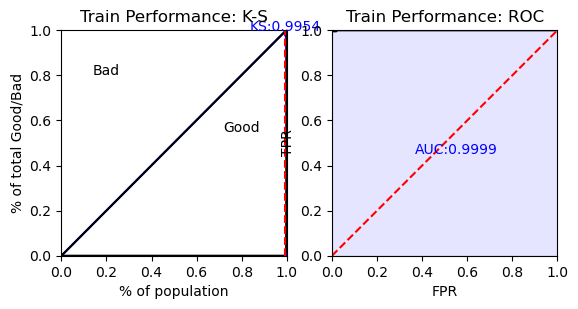

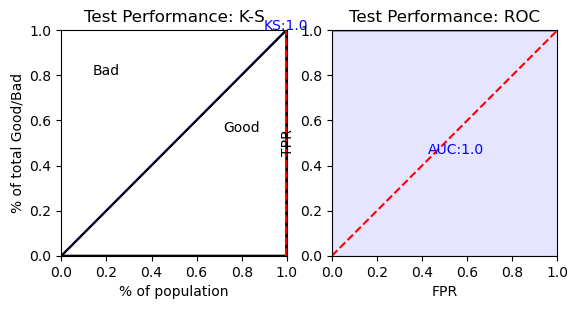

Train Performance Summary:
{'KS': 0.9954, 'AUC': 0.9999, 'Gini': 0.9998, 'pic': <Figure size 640x480 with 2 Axes>}
Test Performance Summary:
{'KS': 1.0, 'AUC': 1.0, 'Gini': 1.0, 'pic': <Figure size 640x480 with 2 Axes>}


In [48]:
# Assuming sc is your evaluation module containing perf_eva function
# Evaluate performance on training data
train_perf = sc.perf_eva(y_train, train_pred, title="Train Performance")
# Evaluate performance on testing data
test_perf = sc.perf_eva(y_test, test_pred, title="Test Performance")

# Optionally, you might want to print or visualize the results
print("Train Performance Summary:")
print(train_perf)

print("Test Performance Summary:")
print(test_perf)


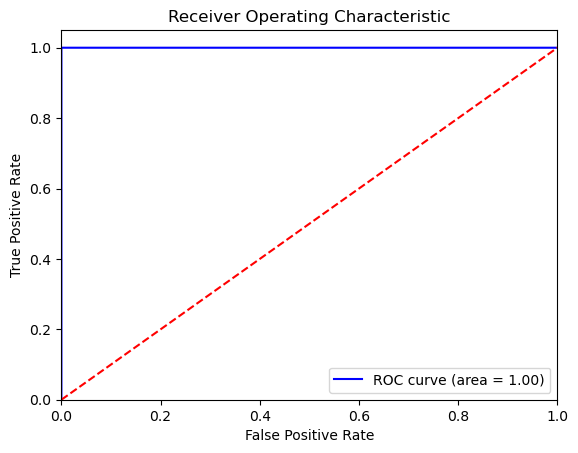

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
